In [17]:
# Import Libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## 1. Perform Data Augmentation -> Fitting the CNN to the Images

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.3, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Let's create a training and testing set with an augmented images
training_set = train_datagen.flow_from_directory('C:/Users/om/Downloads/dogcat(1)/dogcat/cats_and_dogs_filtered/train', 
                                                 target_size = (64, 64), batch_size = 64, class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/om/Downloads/dogcat(1)/dogcat/cats_and_dogs_filtered/validation',
                                           target_size = (64, 64), batch_size = 64, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 2. Create the Model 

In [19]:
# Intialize the CNN
model = Sequential()

# 1st Convolution Block
model.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu')) #1st Conv Layer
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'))  #2nd Conv Layer

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))


# 2nd Convolution Block
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #3rd Conv Layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #4th Conv Layer
#model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #5th Conv Layer

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))


# Flattening Layer
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(64, activation = 'relu'))   # Hidden Layer 1
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))   # Hidden Layer 2
model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))  # Output Layer

In [20]:
# Compiling the Model
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Train the Model
history = model.fit(training_set, epochs = 25, validation_data = test_set)

Epoch 1/25
32/32 [==============================] - 50s 1s/step - loss: 0.6944 - accuracy: 0.5110 - val_loss: 0.6929 - val_accuracy: 0.4990
Epoch 2/25
32/32 [==============================] - 34s 1s/step - loss: 0.6919 - accuracy: 0.5275 - val_loss: 0.6911 - val_accuracy: 0.5910
Epoch 3/25
32/32 [==============================] - 30s 926ms/step - loss: 0.6933 - accuracy: 0.4970 - val_loss: 0.6927 - val_accuracy: 0.5090
Epoch 4/25
32/32 [==============================] - 28s 874ms/step - loss: 0.6938 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 5/25
32/32 [==============================] - 30s 946ms/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6922 - val_accuracy: 0.5290
Epoch 6/25
32/32 [==============================] - 33s 1s/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6870 - val_accuracy: 0.5710
Epoch 7/25
32/32 [==============================] - 32s 993ms/step - loss: 0.6915 - accuracy: 0.5420 - val_loss: 0.6818 - val_accuracy: 0.5990
Epoch 8/

In [22]:
# Save the Model
model.save("C:/Users/om/Downloads/dogcat(1)/dogcat/Cat-Dog-Classifier.h5")

In [23]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## Evaluation

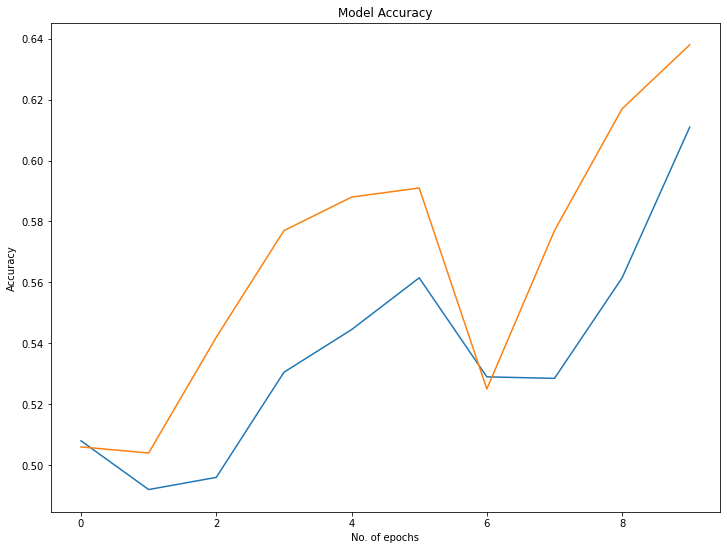

In [12]:
# summarize history for an accuracy

plt.figure(figsize=(12, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.show()

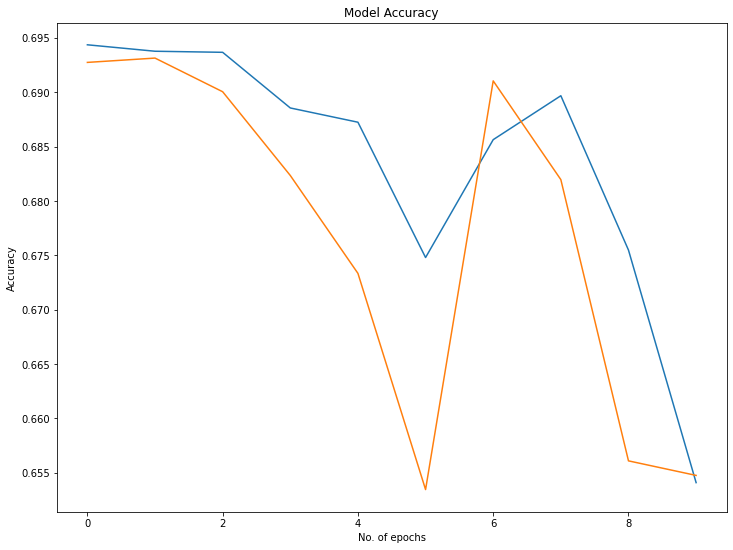

In [13]:
# summarize history for an loss

plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.show()

## Making a Prediction on Test Data

In [11]:
from keras.utils import load_img, img_to_array
test_image = keras.utils.load_img('C:/Users/om/Downloads/dogcat(1)/dogcat/cats_and_dogs_filtered/validation/cats/cat.2012.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'Dog'
    print(prediction)
else:
    prediction = 'Cat'
    print(prediction)

1/1 [==============================] - 3s 3s/step
Dog
